# Case Study - Enron Network Analysis

- I'll try to understand the employee network in Enron from a sample of Enron dataset. 

## Context

he story of Enron is a story of a company that reached from immense heights to deepest lows in no time.
Enron Corp. was one of the biggest firms in the United States and was delivering splendid performance on the wall street. However, the company witnesses a sudden drop in the prices and declared bankruptcy. How one of the most powerful businesses in the US and the world, disintegrated overnight is still a puzzle to many. The Enron leadership was involved in one of the biggest frauds and this particular fraud has been an area of interest for many researchers and  ML practitioners.

In this case study, we have a subset of 50 senior officials and the idea is to build a network from the mails that were sent and received to better understand the connections and highlight the important nodes (people) in this group.

## Steps

- Read the data and understand the structure of it
- Put the data into a graph
- Identify the important nodes from the visualization
- Calculate the centrality measures and quantify the importance
- Highlight the important nodes through color coding and comment on the roles/importance that can be figured out from this

## References
- Dataset - https://www.cs.cmu.edu/~./enron/

In [2]:
# importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# library to deal with networks in python 
import networkx as nx
from networkx.utils import create_random_state, create_py_random_state

# installing the decorator version
from decorator import decorator

In [3]:
# reading the dataset 
data = pd.read_csv('EmailEnron.csv')
# printing the dataset
display(data.head())
data.shape

,From,To
0,0,1
1,1,0
2,1,2
3,1,3
4,1,4


(304, 2)

In [5]:
# creating the graph object
G = nx.Graph()
# building the graph from pandas dataframe
G = nx.from_pandas_edgelist(data, 'From', 'To')

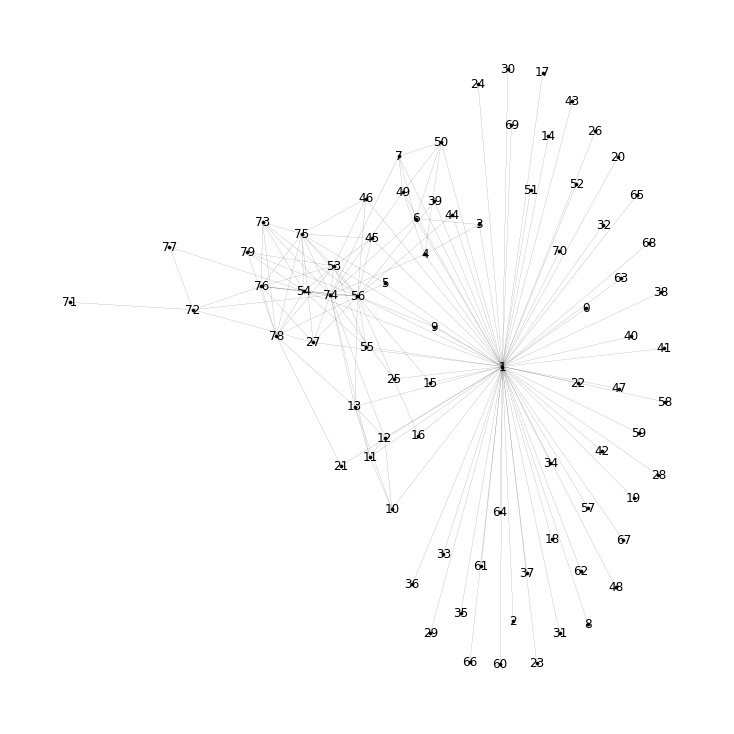

In [8]:
# plotting the graph with matplotlib
plt.figure(figsize=(10,10))

# setting the graph options
options = {'node_color':'black', 'node_size':10, 'linewidths':0.5, 'width':0.1}

nx.draw(G, with_labels=True, **options)
plt.show()

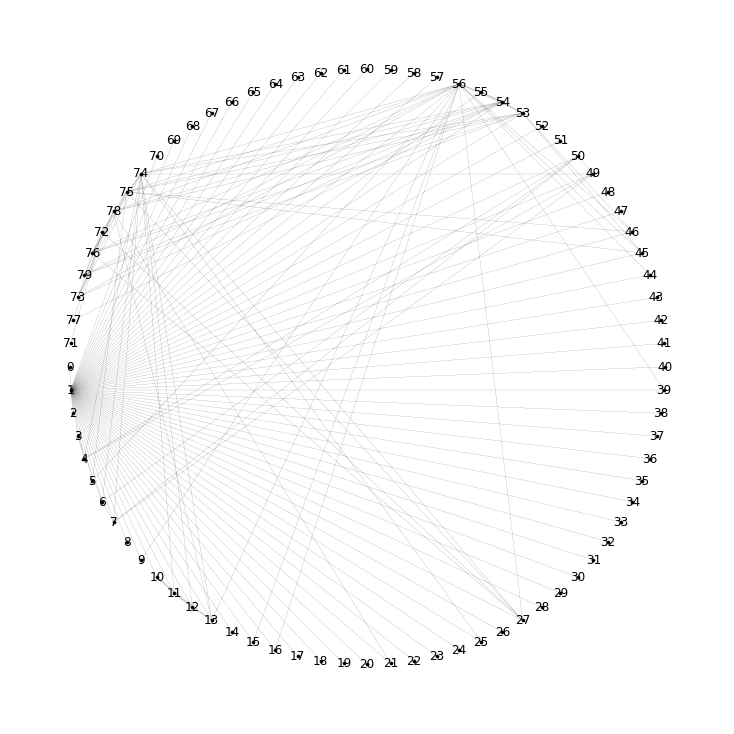

In [9]:
# printing the network in a shell layout (concentric circles)
plt.figure(figsize=(10,10))
nx.draw_shell(G, with_labels=True, **options)
plt.show()

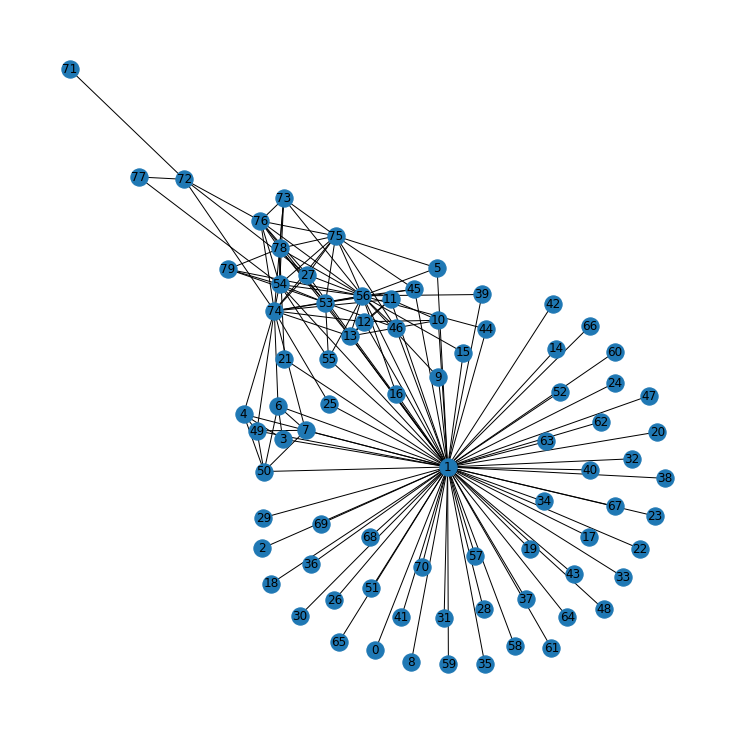

In [10]:
# printing network in spring layout with the default parameters
plt.figure(figsize=(10,10))
nx.draw_spring(G, with_labels=True)

## Observations
- Out of the 80 nodes in the dataset, 1 appears to be the most important node and is connected with all the other nodes. We can interpret this official, perhaps as the CEO. 
- Other important nodes are also highlighted in the visualization - 56,54,74,53,50. The circular visualization is a better visualization approach to clearly highlight the important nodes.
- There are internal tea structures that appear to from the visualization but are not very clear as to which nodes are part of the teams. 

In [11]:
# printing the degree of each node
for i in G.degree():
    print(i)

(0, 1)
(1, 70)
(2, 1)
(3, 3)
(4, 5)
(5, 3)
(6, 5)
(7, 5)
(8, 1)
(9, 2)
(10, 4)
(11, 5)
(12, 5)
(13, 7)
(14, 1)
(15, 2)
(16, 2)
(17, 1)
(18, 1)
(19, 1)
(20, 1)
(21, 2)
(22, 1)
(23, 1)
(24, 1)
(25, 2)
(26, 1)
(27, 6)
(28, 1)
(29, 1)
(30, 1)
(31, 1)
(32, 1)
(33, 1)
(34, 1)
(35, 1)
(36, 1)
(37, 1)
(38, 1)
(39, 2)
(40, 1)
(41, 1)
(42, 1)
(43, 1)
(44, 2)
(45, 4)
(46, 4)
(47, 1)
(48, 1)
(49, 5)
(50, 5)
(51, 1)
(52, 1)
(53, 11)
(54, 11)
(55, 4)
(56, 20)
(57, 1)
(58, 1)
(59, 1)
(60, 1)
(61, 1)
(62, 1)
(63, 1)
(64, 1)
(65, 1)
(66, 1)
(67, 1)
(68, 1)
(69, 1)
(70, 1)
(74, 16)
(75, 11)
(78, 9)
(72, 5)
(76, 9)
(79, 4)
(73, 6)
(77, 2)
(71, 1)


## Centrality Measures

In [12]:
# signing each centrality measure to a variable
deg_cen = nx.degree_centrality(G)
eig_cen = nx.eigenvector_centrality(G)
clo_cen = nx.closeness_centrality(G)
bet_cen = nx.betweenness_centrality(G)

### Degree Centrality

In [19]:
temp = {}

# top 5 nodes in deg_cen 
for w in sorted(deg_cen, key=deg_cen.get, reverse=True):
    temp[w] = deg_cen[w]

print(f'Sorted importance of nodes in terms of deg_cen are {list(temp.keys())[:5]}')

Sorted importance of nodes in terms of deg_cen are [1, 56, 74, 53, 54]


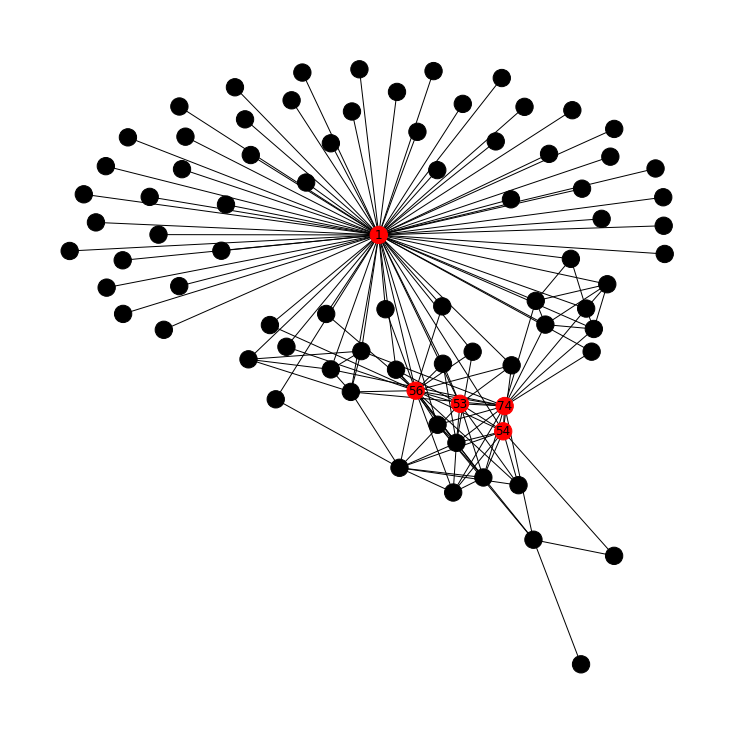

In [20]:
# coloring top 5 nodes in deg_cen
color = []

for node in G:
    if node in list(temp.keys())[:5]:
        color.append('red')
    else:
        color.append('black')

plt.figure(figsize=(10,10))
nx.draw(G, node_color=color, with_labels=True)
plt.show()

### Eigen Vector Centrality

In [21]:
temp = {}

for w in sorted(eig_cen, key=eig_cen.get, reverse=True):
    temp[w] =  eig_cen[w]

print(f'Sorted importance o fnodes in terms of eig_cen are {list(temp.keys())[:5]}')

Sorted importance o fnodes in terms of eig_cen are [1, 56, 74, 53, 54]


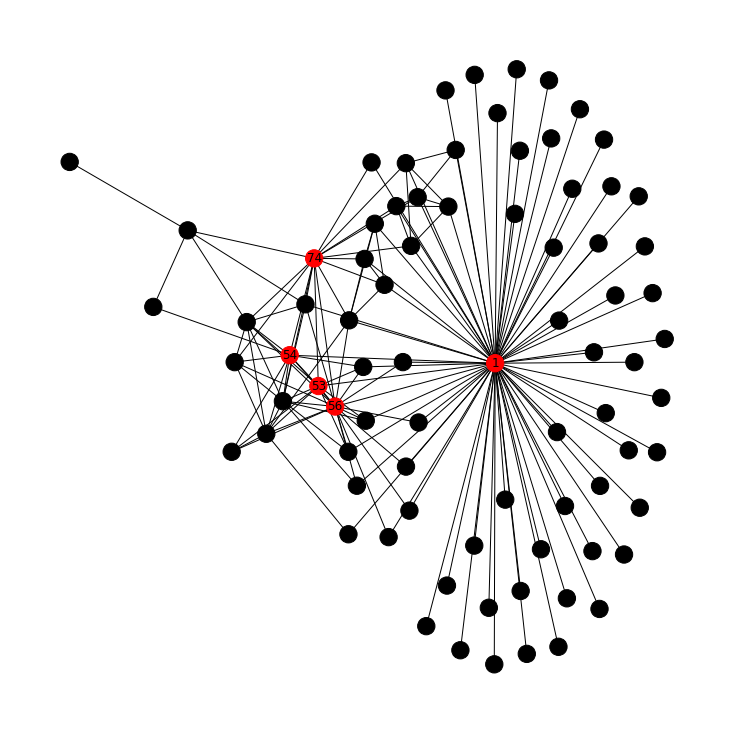

In [23]:
color = []

for node in G:
    if node in list(temp.keys())[:5]:
        color.append('red')
    else:
        color.append('black')

plt.figure(figsize=(10,10))
nx.draw(G, node_color=color, with_labels=True)
plt.show()

### Betweenness Centrality

In [24]:
temp = {}

for w in sorted(bet_cen, key=bet_cen.get, reverse=True):
    temp[w] = bet_cen[w]

print(f'Sorted importance of nodes in terms of bet_cen are {list(temp.keys())[:5]}')

Sorted importance of nodes in terms of bet_cen are [1, 56, 54, 27, 74]


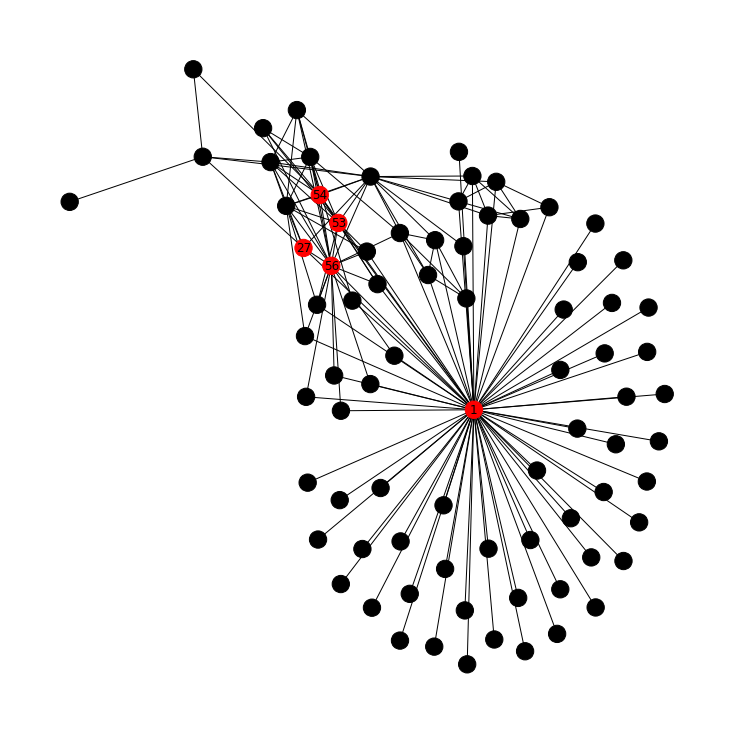

In [28]:
color = []

for node in G:
    if node in list(temp.keys())[:5]:
        color.append('red')
    else:
        color.append('black')

plt.figure(figsize=(10,10))
nx.draw(G, node_color=color, with_labels=True)
plt.show()

### Closenes Centrality

In [26]:
temp = {}

for w in sorted(clo_cen, key=clo_cen.get, reverse=True):
    temp[w] = clo_cen[w]

print(f'Sorted importance of nodes in terms of clo_cen are {list(temp.keys())[:5]}')

Sorted importance of nodes in terms of clo_cen are [1, 56, 53, 54, 27]


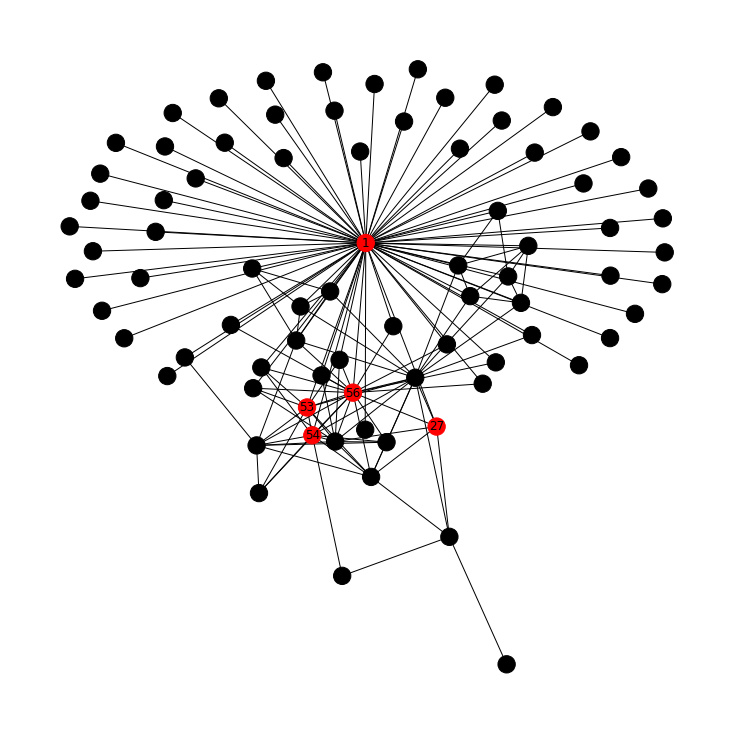

In [27]:
color = []

for node in G:
    if node in list(temp.keys())[:5]:
        color.append('red')
    else:
        color.append('black')

plt.figure(figsize=(10,10))
nx.draw(G, node_color=color, with_labels=True)
plt.show()

### Conclusion

- I figured out the connections in the organization through visualizing networks.
- I also worked on various centrality measures, I figured out the important nodes in terms of various centrality measures. The importance of these nodes can be further explained by the definitions of the centralities they correspond to.
- I also identified the CEO node i.e. Node 1
- I could figure out that there were internal team structures but the connections were not very clear